In [1]:
import tweepy 
from textblob import TextBlob

In [2]:
consumer_key= 'nYpX55FOg2ZLqVAGvOIc4UOaS'
consumer_secret= 'afg6VqSdbTIJbiLkYfuX74f0ztAlw9K0ISCBEOdAf4yEEimxFf'
access_token= '1313300208990609413-69neq8nRzQJMMXrwa9gqM3l9cBQpTl'
access_token_secret= 'HNB4i2iuxP36DZXPNbSwn2x0p1t4KvRIATUf9QpvIq6GL'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

public_tweets = api.search('Donald trump')
for tweet in public_tweets:
    print(tweet.text)
    analysis=TextBlob(tweet.text)
    print(analysis.sentiment)

RT @WakingLifeDream: Back to the Future Part II was released by Universal Pictures on November 22, 1989 - 31 years ago today.

Back to the…
Sentiment(polarity=0.0, subjectivity=0.03125)
@MSpicuzzaMJS @MollyBeck @AlisonDirr "The attorney leading President Donald Trump’s recount effort in Wisconsin vot… https://t.co/jXnW8bxf9N
Sentiment(polarity=0.0, subjectivity=0.0)
RT @ThePubliusUSA: BREAKING: The United States formally leaves the Open Skies Treaty. In other words, Donald Trump delivers final gift to V…
Sentiment(polarity=-0.041666666666666664, subjectivity=0.625)
RT @AnaMercedesDiaz: Quieren hacernos creer como sea que Trump no fue reelecto. Cada vez mas pruebas y testimonios a favor del Presidente D…
Sentiment(polarity=0.0, subjectivity=0.0)
RT @repmarkpocan: Make no mistake, Donald Trump knows he lost the election.

He just wants to destroy democracy before he leaves office.

A…
Sentiment(polarity=0.0, subjectivity=0.05)
RT @donwinslow: In the final analysis, there has to be accoun

In [3]:
for tweet in public_tweets:
    print(tweet.text)
    analysis=TextBlob(tweet.text)
    print(analysis.sentiment)
    if analysis.sentiment[0]>0:
        print('positive')
    elif analysis.sentiment[0]<0:
        print('Negative')
    else:
        print('Neutral')

RT @WakingLifeDream: Back to the Future Part II was released by Universal Pictures on November 22, 1989 - 31 years ago today.

Back to the…
Sentiment(polarity=0.0, subjectivity=0.03125)
Neutral
@MSpicuzzaMJS @MollyBeck @AlisonDirr "The attorney leading President Donald Trump’s recount effort in Wisconsin vot… https://t.co/jXnW8bxf9N
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @ThePubliusUSA: BREAKING: The United States formally leaves the Open Skies Treaty. In other words, Donald Trump delivers final gift to V…
Sentiment(polarity=-0.041666666666666664, subjectivity=0.625)
Negative
RT @AnaMercedesDiaz: Quieren hacernos creer como sea que Trump no fue reelecto. Cada vez mas pruebas y testimonios a favor del Presidente D…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @repmarkpocan: Make no mistake, Donald Trump knows he lost the election.

He just wants to destroy democracy before he leaves office.

A…
Sentiment(polarity=0.0, subjectivity=0.05)
Neutral
RT @donwinslow: In t

In [4]:
query = 'Donald trump'
max_tweets = 2000
searched_tweets = [status for status in tweepy.Cursor(api.search, q=query).items(max_tweets)]
pos = 0
neg = 0
neu = 0
for tweet in searched_tweets:
    analysis = TextBlob(tweet.text)
    if analysis.sentiment[0]>0:
        pos = pos +1
    elif analysis.sentiment[0]<0:
        neg = neg + 1
    else:
        neu = neu + 1
print("Total Positive = ", pos)
print("Total Negative = ", neg)
print("Total Neutral = ", neu)

Total Positive =  383
Total Negative =  408
Total Neutral =  1209


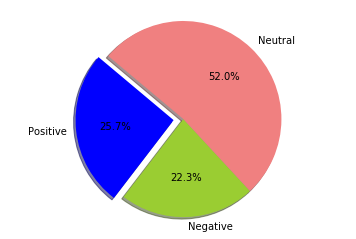

In [6]:
#Plotting sentiments
import matplotlib.pyplot as plt
labels = 'Positive', 'Negative', 'Neutral'
sizes = [257, 223, 520]
colors = ['blue', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [7]:
#create a dataframe of all the tweet data that we have downloaded
import pandas as pd
tweets = [{'Tweets':tweet.text, 'Timestamp':tweet.created_at} for tweet in searched_tweets ]
tweets[:10]

[{'Tweets': '@MSNBC Until the system changes the good people won’t be allowed to fix anything. How long have people been screami… https://t.co/jQBCi251fW',
  'Timestamp': datetime.datetime(2020, 11, 23, 5, 19, 20)},
 {'Tweets': 'RT @JonLemire: “But Trump’s team largely ignored advice from Obama staffers, leaving briefing books unopened and ignoring special iPads loa…',
  'Timestamp': datetime.datetime(2020, 11, 23, 5, 19, 17)},
 {'Tweets': 'RT @FredTJoseph: I hope the history books remember that most Republicans were complicit as Donald Trump staged a coup.',
  'Timestamp': datetime.datetime(2020, 11, 23, 5, 19, 15)},
 {'Tweets': 'RT @cbcradio: Donald Trump "is more than happy to fan racist sentiments, and that from a leader ... is a problem," said former U.S. preside…',
  'Timestamp': datetime.datetime(2020, 11, 23, 5, 19, 14)},
 {'Tweets': 'RT @johnpavlovitz: Donald Trump is the stupidest hill to die on.',
  'Timestamp': datetime.datetime(2020, 11, 23, 5, 19, 13)},
 {'Tweets': 'RT @d

In [8]:
df=pd.DataFrame.from_dict(tweets)
df.head()

,Timestamp,Tweets
0,2020-11-23 05:19:20,@MSNBC Until the system changes the good peopl...
1,2020-11-23 05:19:17,RT @JonLemire: “But Trump’s team largely ignor...
2,2020-11-23 05:19:15,RT @FredTJoseph: I hope the history books reme...
3,2020-11-23 05:19:14,"RT @cbcradio: Donald Trump ""is more than happy..."
4,2020-11-23 05:19:13,RT @johnpavlovitz: Donald Trump is the stupide...


In [9]:
df.shape

(2000, 2)

In [11]:
#clean this data
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     E:\anaconda3\lib\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
#Cleaning Data

#Removing @ handle
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

df['Tweets'] = np.vectorize(remove_pattern)(df['Tweets'], "@[\w]*")

In [13]:
df.head()

,Timestamp,Tweets
0,2020-11-23 05:19:20,Until the system changes the good people won’...
1,2020-11-23 05:19:17,RT : “But Trump’s team largely ignored advice ...
2,2020-11-23 05:19:15,RT : I hope the history books remember that mo...
3,2020-11-23 05:19:14,"RT : Donald Trump ""is more than happy to fan r..."
4,2020-11-23 05:19:13,RT : Donald Trump is the stupidest hill to die...


In [14]:
#perform NLP operations on the tweets including taking only alphabets, 
#converting all to lower cases, tokenization and stemming. As retweets, hypertexts etc. 
#are present in the tweets, we need to remove all those unneccessary information.
nltk.download('wordnet')
stop_words=stopwords.words('english')
custom_stopwords = ('RT')


[nltk_data] Downloading package wordnet to
[nltk_data]     E:\anaconda3\lib\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### preprocessing

In [17]:
from textblob import Word
#lemmatization
def preprocessed_tweets(tweet,custom_stopwords):
    preprocessed_tweet=tweet
    preprocessed_tweet.replace('[^\w\s]', '')
    preprocessed_tweet=re.sub('http', '',preprocessed_tweet)
    preprocessed_tweet = re.sub('https', '',preprocessed_tweet)
    preprocessed_tweet=' '.join(word for word in preprocessed_tweet.split() if word not in stop_words)
    preprocessed_tweet=' '.join(word for word in preprocessed_tweet.split() if word not in custom_stopwords)
    preprocessed_tweet=' '.join(Word(word).lemmatize() for word in preprocessed_tweet.split()) 
    preprocessed_tweet.lower()
   
    return(preprocessed_tweet)

df['preprocessed Tweet']= df['Tweets'].apply(lambda x:preprocessed_tweets(x,custom_stopwords))

df.head()

,Timestamp,Tweets,preprocessed Tweet
0,2020-11-23 05:19:20,Until the system changes the good people won’...,Until system change good people won’t allowed ...
1,2020-11-23 05:19:17,RT : “But Trump’s team largely ignored advice ...,: “But Trump’s team largely ignored advice Oba...
2,2020-11-23 05:19:15,RT : I hope the history books remember that mo...,: I hope history book remember Republicans com...
3,2020-11-23 05:19:14,"RT : Donald Trump ""is more than happy to fan r...",": Donald Trump ""is happy fan racist sentiments..."
4,2020-11-23 05:19:13,RT : Donald Trump is the stupidest hill to die...,: Donald Trump stupidest hill die on.


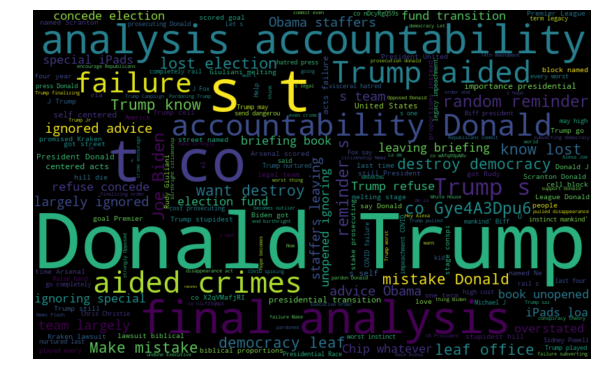

In [18]:
#Visualization
from wordcloud import WordCloud
#Word Cloud
all_words = ' '.join([text for text in df['preprocessed Tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [24]:
#Term Freuency - TF-IDF
#most frequent terms appeared in the tweet data
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['preprocessed Tweet'])
#Count Most Frequent Words
Counter = Counter(df['preprocessed Tweet'])
most_occur = Counter.most_common(10) 
print(most_occur)

[(': In final analysis, accountability Donald Trump aided crimes. The failure…', 385), (': Just random reminder: s://t.co/Gye4A3Dpu6', 92), (': Make mistake, Donald Trump know lost election. He want destroy democracy leaf office. A…', 75), (': “But Trump’s team largely ignored advice Obama staffers, leaving briefing book unopened ignoring special iPads loa…', 59), (': Because Donald Trump refuse concede election, fund transition ourselves. Chip whatever can…', 57), (': The importance presidential transition cannot overstated. Of Donald Trump’s self-centered acts, failure to…', 54), (': The last time Arsenal scored goal Premier League, Donald Trump still President United States Of…', 31), (': I promised Kraken lawsuit biblical proportions, instead I got Rudy Giuliani melting stage conspi…', 28), (': Donald Trump stupidest hill die on.', 22), (': Joe Biden got street named Scranton Donald Trump cell block named Ne…', 21)]
